<a href="https://colab.research.google.com/github/Radonja99/PPPO2022-Segmentacija-Radonja-Milutinovic-IT18-2018/blob/main/Segmentation_Radonja_Milutinovic_IT18_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predmet: Principi prezentacije i prepoznavanja oblika

Student: Radonja Milutinović IT18-2018

Tema: Segmentacija

# Uvod

Segmentacija predstavlja jednu od tehnika digitalne obrade slike.

U digitalnoj obradi slike, segmentacija predstavlja proces podele digitalne slike na više segmenata, tj. različitih regiona ili kategorija. Kako segment predstavlja skup piksela, svaka regija sadrži piksele sa sličnim atributima, a svaki piksel na fotografiji se dodeljuje jednoj kategoriji. Stoga, segmentacija fotografije predstavlja postupak dodeljivanja oznake svakom pikselu na fotografiji tako da pikseli sa istom oznakom dele određene karakteristike.

Cilj segmentacije jeste da se pojednostavi i/ili promeni prikaz slike u nešto što je smislenije i lakše za analiziranje. Ona se obično koristi za lociranje objekata i granica na fotografijama.

**Metode segmentacije**

Osnovna podela segmentacije je na: semantičku segmentaciju i segmentaciju instance.

Semantička segmentacija razlikuje pozadinu od traženog predmeta(klase) dok segmentacija instance takođe i razlikuje različite instance tog predmeta. Primer je prikazan na slici ispod.


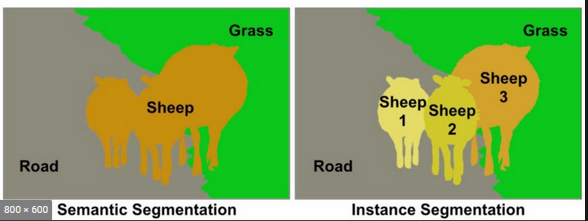

**Algoritmi i tehnike za segmentaciju**

Među autorima postoje četiri najčešće tehnike koje se koriste za segmentaciju fotografije, a to su:
1. Segmentacija pragom
2. Segmentacija klasterizacijom 
3. Segmentacija regionom
4. Segmentacija granicom regiona

Segmentacija pragom, tj. Tresholding je zasnovana na poređenju osvetljenja piksela sa jednim ili više pragova. Razlikujemo segmentaciju sa jednim i sa više pragova. Segmentacija sa jednim pragom je najosnovniji vid segmentacije i koristi se za razlikovanje pozadine od objekta. 

Segmentacija klasterizacijom tj. Clustering predstavlja jednu od najstarijih tehnika segmentacije i može se koristiti za segmentaciju sivih slika i slika u boji. Postupak segmentacije započinje od postupka klasterizacije, odnosno podele N-dimenzinog prostora u uzajamno isključive oblasti, pri čemu svaka ta oblast obuhvata grupu podataka koja se odosi na jedan region slike. Zatim se u narednoj fazi određuje optimalan broj regiona (klastera), kao i određivanje skupa vektora koji predstavljaju centre svakog klastera.

Segmentacija regionom (Region) predstavlja skup metoda koje pokušavaju da izdvoje područja slike koja su homogena sa gledišta određenih karakteristika. U ovu grupu spadaju:
    1. Segmentacija pomoću rasta regiona 
    2. Segmentacija pomoću razdvajanja i spajanja regiona 

    
U procesu segmentacije koji koristi ivice (Edge) mora se primeniti i neki postupak za spajanje ivica, kako bi se formirale neprekidne granice regiona iz razloga što metode koje vrše izdvajanje ivica generišu isprekidane granice objekata a ne zatvorene krive.Glavna prednost ovog metoda je njena izuzetna jednostavnost i ona daje dobre rezultate u slučaju segmentacije jednostavnih scena. Međutim, kada su slike na kojima postoji veći broj objekata koji se preklapaju, mapa ivica sadrži tačke grananja, pa u tom slučaju ova metoda ne daje dobre rezultate.


**Projekat**

Zadatak ovog projekta je bio da se preuzmu seizmičke fotografije površine zemlje sa sledećeg [linka](https://docs.google.com/uc?export=download&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF) i zatim da se kreira model koji bi prihvatio te fotografije i predvideo da li se na fotografiji nalazi so ispod površine zemlje. Model treba da podeli fotografiju na deo koji predstavlja deo zemlje koji sadrži so i deo koji ne sadrži. 

Kada se preuzme dataset sa linka, potrebno ga je otpakovati, kao i kasnije train podatke koje služe za trening modela. U train folderu se nalaze dva foldera: 
1. Images - Seizmičke fotografije zemlje 
2. Masks - Maska koja odgovara jednoj fotografiji i na kojoj je prikazano gde se so nalazi. 

Za izradu projekta korišćena je U-net konvoluciona neuronska mreža. 
Mreža se sastoji od ugovarajuće (engl. contracting) i ekspanzivne (engl. expansive) putanje što joj daje arhitekturu u obliku slova U. Ugovarajući put je tipična konvolucijska neuronska mreža koja se sastoji od ponovljene primene konvolucija, nakon čega sledi ispravljena linearna jedinica (engl. Rectified Linear Unit ili ReLU) i maksimalna operacija udruživanja (engl. max pooling).

# **Reference**

\[1\] Linda G. Shapiro, George C. Stockman. *Computer Vision*. New Jersey. Prentice-Hall (2001)

\[2\] Guo Dazhou, Pei Yanting, Zheng Kang, Yu Hongkai, Lu Yuhang, Wang Song. *Degraded Image Semantic Segmentation With Dense-Gram Networks*. IEEE Transactions on Image Processing (2020)

\[3\] Yi Jingru, Wu Pengxiang, Jiang Menglin, Huang Qiaoying, Hoeppner J. Daniel, Metaxas N. Dimitris. *Attentive neural cell instance segmentation*. Medical Image Analysis (2019)

\[4\] Barghout Lauren, Sheynin Jacob. *Real-world scene perception and perceptual organization: Lessons from Computer Vision*. Journal of Vision (2013)

\[5\] Olaf Ronneberger, Philipp Fischer, Thomas Brox. *U-Net: Convolutional Networks for Biomedical Image Segmentation*. Springer (2015)

\[6\] https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection

Pre svega je potrebno preuzeti dataset i sacuvati ga. Takođe se preporučuje da se runtime accelerator namesti na GPU, kako bi trening zahtevao manje vremena.

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF" -O dataset.zip && rm -rf /tmp/cookies.txt

--2022-08-28 11:50:48--  https://docs.google.com/uc?export=download&confirm=t&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF
Resolving docs.google.com (docs.google.com)... 172.253.115.139, 172.253.115.101, 172.253.115.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amvj5csacn5gbnq15vrvpep7g4rlnu31/1661687400000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download&uuid=fb5d834c-aec9-4d49-b8f1-cdf114c8be36 [following]
--2022-08-28 11:50:48--  https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/amvj5csacn5gbnq15vrvpep7g4rlnu31/1661687400000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download&uuid=fb5d834c-aec9-4d49-b8f1-cdf114c8be36
Resolving doc-0s-64-docs.googleusercontent.com (doc-0s-64-docs.googleusercontent.com)... 172.253.122.

Potrebno je unzipovati fajl

In [5]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: competition_data.zip    
  inflating: depths.csv              
  inflating: flamingo.zip            
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


Kao i podatke za trening.

In [6]:
!mkdir -p /content/dataset/train
!unzip train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/images/d80ead8703.png  
  inflating: /content/dataset/train/images/b012e9ebb0.png  
  inflating: /content/dataset/train/images/d3034e7a60.png  
  inflating: /content/dataset/train/images/ae2ef70d51.png  
  inflating: /content/dataset/train/images/1af44a9db0.png  
  inflating: /content/dataset/train/images/41cfd4b320.png  
  inflating: /content/dataset/train/images/853e89d0d3.png  
  inflating: /content/dataset/train/images/2a484baa26.png  
  inflating: /content/dataset/train/images/92e617896e.png  
  inflating: /content/dataset/train/images/b70f0ab0c2.png  
  inflating: /content/dataset/train/images/e8757626a1.png  
  inflating: /content/dataset/train/images/6a3d92ce59.png  
  inflating: /content/dataset/train/images/127ef4105f.png  
  inflating: /content/dataset/train/images/d21012f5c1.png  
  inflating: /content/dataset/train/images/1cb9549d2c.png  
  inflating: /content/dataset/train/images/e030bd

Zatim je potrebno importovati biblioteke koje ćemo koristiti u daljem radu. Tensorflow je biblioteka čiji je primarni fokus deep learning. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
import os
from tensorflow.keras import Model, Input
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf

Definišemo putanje ka folderima u kojima su smešteni podaci. 

In [8]:
DATASET_PATH = '/content/dataset/'

TRAIN_IMAGE_DIR = os.path.join(DATASET_PATH, 'train/images')
TRAIN_MASK_DIR = os.path.join(DATASET_PATH, 'train/masks')

MODEL_OUTPUT_PATH = 'unet_model.pth'

train_d = os.listdir(TRAIN_IMAGE_DIR)

Formiramo nizove sa slikama i maskama. Takođe se vrši normalizacija.

In [9]:
x = [np.array(cv2.imread(TRAIN_IMAGE_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
x = np.array(x)/255

y = [np.array(cv2.imread(TRAIN_MASK_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
y = np.array(y)/255

print(x.shape, y.shape)

(4000, 101, 101) (4000, 101, 101)


Funkcija za nasumično prikazivanje fotografija

In [10]:
def plotImages(file1, file2, k, alpha = 0.4):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  return(fig)

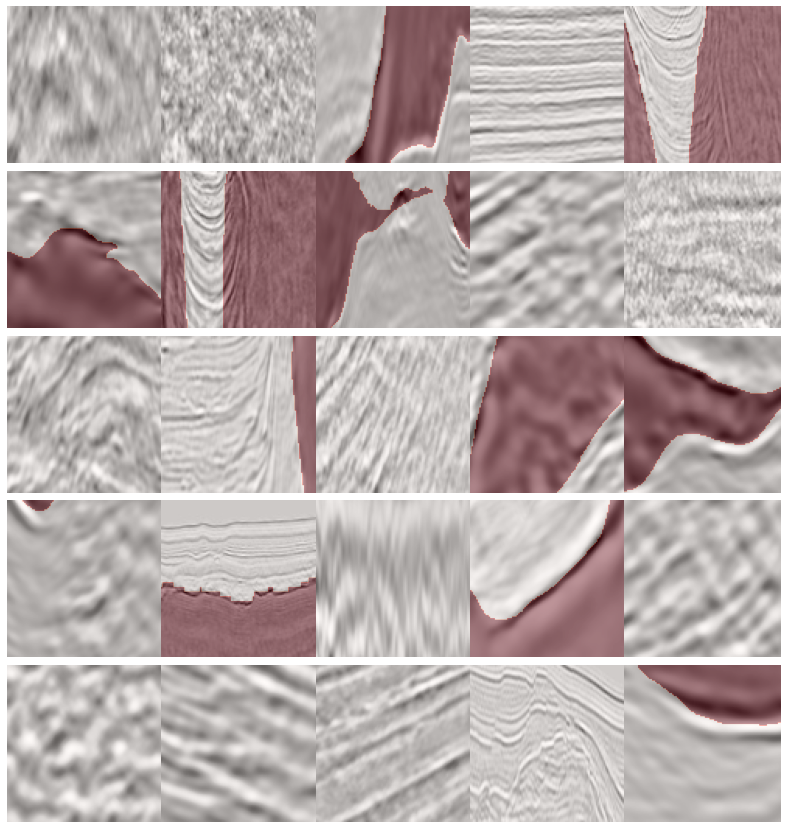

In [11]:
fig = plotImages(x,y,k=5)

Podela trening podataka, 80/20 .

In [12]:
x_train,x_validation,y_train,y_validation = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=50)

In [13]:
print("x_train shape:",x_train.shape)
print("x_validation shape:",x_validation.shape)
print("y_train shape:",y_train.shape)
print("y_validation shape:",y_validation.shape)

x_train shape: (3200, 101, 101)
x_validation shape: (800, 101, 101)
y_train shape: (3200, 101, 101)
y_validation shape: (800, 101, 101)


Kreiranje CNN modela. 

In [14]:


def BatchActivate(x):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

#definisanje konvolucionog bloka
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    if activation==True: x = BatchActivate(x)
    return x

#definisanje residual (identity) bloka
def residual_block(blockInput, num_filters=16, batch_activate=False):
    x = BatchActivate(blockInput)
    x = convolution_block(x, num_filters, (3,3))
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    if batch_activate: x = BatchActivate(x)
    return x



Spajanje konvolucionih i rezidualnih blokova kako bi se kreirala ResNet mreža.

In [15]:
def build_model(input_layer, start_neurons, DropoutRatio=0.5):
    # 101 -> 50
    conv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(input_layer)
    conv1 = residual_block(conv1, start_neurons*1)
    conv1 = residual_block(conv1, start_neurons*1, True)
    pool1 = MaxPooling2D((2,2))(conv1)
    pool1 = Dropout(DropoutRatio/2)(pool1)
    print("conv1", conv1)
    # 50 -> 25
    conv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(pool1)
    conv2 = residual_block(conv2, start_neurons*2)
    conv2 = residual_block(conv2, start_neurons*2, True)
    pool2 = MaxPooling2D((2,2))(conv2)
    pool2 = Dropout(DropoutRatio)(pool2)
    print("conv2", conv2)
    # 25 -> 12
    conv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(pool2)
    conv3 = residual_block(conv3, start_neurons*4)
    conv3 = residual_block(conv3, start_neurons*4, True)
    pool3 = MaxPooling2D((2,2))(conv3)
    pool3 = Dropout(DropoutRatio)(pool3)
    print("conv3", conv3)
    # 12 -> 6
    conv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(pool3)
    conv4 = residual_block(conv4, start_neurons*8)
    conv4 = residual_block(conv4, start_neurons*8, True)
    pool4 = MaxPooling2D((2,2))(conv4)
    pool4 = Dropout(DropoutRatio)(pool4)
    print("conv4", conv4)
    # Middle
    convm = Conv2D(start_neurons*16, (3,3), activation=None, padding='same')(pool4)
    convm = residual_block(convm, start_neurons*16)
    convm = residual_block(convm, start_neurons*16, True)
    print("convm", convm)
    # 6 -> 12
    deconv4 = Conv2DTranspose(start_neurons*8, (3,3), strides=(2,2), padding='same')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(DropoutRatio)(uconv4)
    
    uconv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(uconv4)
    uconv4 = residual_block(uconv4, start_neurons*8)
    uconv4 = residual_block(uconv4, start_neurons*8, True)
    print("conv4", uconv4)
    # 12 -> 25
    deconv3 = Conv2DTranspose(start_neurons*4, (3,3), strides=(2,2), padding='valid')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(DropoutRatio)(uconv3)
    
    uconv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(uconv3)
    uconv3 = residual_block(uconv3, start_neurons*4)
    uconv3 = residual_block(uconv3, start_neurons*4, True)
    print("conv3", uconv3)
    # 25 -> 50
    deconv2 = Conv2DTranspose(start_neurons*2, (3,3), strides=(2,2), padding='same')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(DropoutRatio)(uconv2)
    
    uconv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(uconv2)
    uconv2 = residual_block(uconv2, start_neurons*2)
    uconv2 = residual_block(uconv2, start_neurons*2, True)
    print("conv2", uconv2)
    # 50 -> 101
    deconv1 = Conv2DTranspose(start_neurons*1, (3,3), strides=(2,2), padding='valid')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(DropoutRatio)(uconv1)
    
    uconv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(uconv1)
    uconv1 = residual_block(uconv1, start_neurons*1)
    uconv1 = residual_block(uconv1, start_neurons*1, True)
    
    output_layer_noActi = Conv2D(1, (1,1), padding='same', activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)
    
    return output_layer

In [17]:
input_layer = Input((101, 101, 1))
output_layer = build_model(input_layer, 32,0.5)

model = Model(input_layer, output_layer)

conv1 KerasTensor(type_spec=TensorSpec(shape=(None, 101, 101, 32), dtype=tf.float32, name=None), name='activation_4/Relu:0', description="created by layer 'activation_4'")
conv2 KerasTensor(type_spec=TensorSpec(shape=(None, 50, 50, 64), dtype=tf.float32, name=None), name='activation_9/Relu:0', description="created by layer 'activation_9'")
conv3 KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25, 128), dtype=tf.float32, name=None), name='activation_14/Relu:0', description="created by layer 'activation_14'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_19/Relu:0', description="created by layer 'activation_19'")
convm KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 512), dtype=tf.float32, name=None), name='activation_24/Relu:0', description="created by layer 'activation_24'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_29/Relu:0', description="cre

Kompajliranje modela. Koristi se Adam optimizacioni algoritam. 

In [18]:
model.compile(loss = "binary_crossentropy", optimizer= "adam", metrics= ["accuracy"])

Vrši se treniranje modela. Kako bi se smanjio overfitting koristi se early stopping tehnika koja, ako se accuracy ne poboljša za min_delta koji je 0.001 u 5 uzastopnih epoha(definisano sa patience), prekida izvršavanje. 

In [24]:
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=0.00000005, verbose=1)

history = model.fit(x_train, y_train, validation_data=(x_validation,y_validation), epochs = 15, batch_size = 128, callbacks = [early_stopping, model_checkpoint, reduce_LR])

Epoch 1/15
25/25 [==============================] - ETA: 0s - loss: 0.1903 - accuracy: 0.9277
Epoch 1: val_accuracy improved from -inf to 0.33002, saving model to ./keras.model
25/25 [==============================] - 50s 2s/step - loss: 0.1903 - accuracy: 0.9277 - val_loss: 4.1962 - val_accuracy: 0.3300 - lr: 1.0000e-04
Epoch 2/15
25/25 [==============================] - ETA: 0s - loss: 0.1804 - accuracy: 0.9310
Epoch 2: val_accuracy improved from 0.33002 to 0.36042, saving model to ./keras.model
25/25 [==============================] - 50s 2s/step - loss: 0.1804 - accuracy: 0.9310 - val_loss: 3.0314 - val_accuracy: 0.3604 - lr: 1.0000e-04
Epoch 3/15
25/25 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.9304
Epoch 3: val_accuracy improved from 0.36042 to 0.39958, saving model to ./keras.model
25/25 [==============================] - 50s 2s/step - loss: 0.1806 - accuracy: 0.9304 - val_loss: 2.7654 - val_accuracy: 0.3996 - lr: 1.0000e-04
Epoch 4/15
25/25 [=======

Čuva se model u već definisani output path.

In [25]:
model.save_weights(MODEL_OUTPUT_PATH)

Histogram koji prikazuje Loss i Accuracy krive tokom epoha.



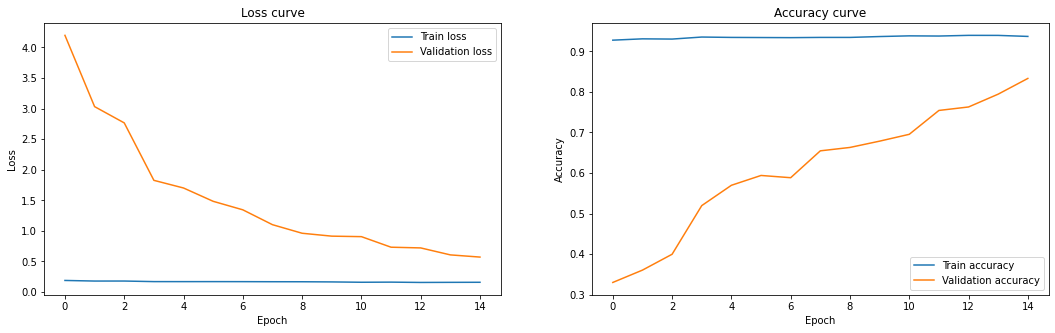

In [26]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(18, 5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_xlabel("Epoch")
ax_loss.set_ylabel("Loss")
ax_loss.set_title("Loss curve")
ax_loss.legend()
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax_acc.set_xlabel("Epoch")
ax_acc.set_ylabel("Accuracy")
ax_acc.set_title("Accuracy curve")
ax_acc.legend()

In [27]:
result = model.evaluate(x_validation, y_validation)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

25/25 [==============================] - 2s 95ms/step - loss: 0.5722 - accuracy: 0.8333
[+] Accuracy: 83.33%


In [28]:
pred_validation = model.predict(x_validation)
pred_validation = pred_validation[:,:,:,0]
print(x_validation.shape, y_validation.shape)

(800, 101, 101) (800, 101, 101)


Crvena boja predstavlja stvarne vrednosti gde se so nalazi, dok je zelena predikcija.

In [29]:
def plotValidationImages(file1, file2, file3, k, alpha1, alpha2):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha1)
      ax[i,j].imshow(file3[ind], cmap='Greens', alpha = alpha2)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  plt.suptitle("Crvena: so    Zelena: predikcija")
  return(fig)

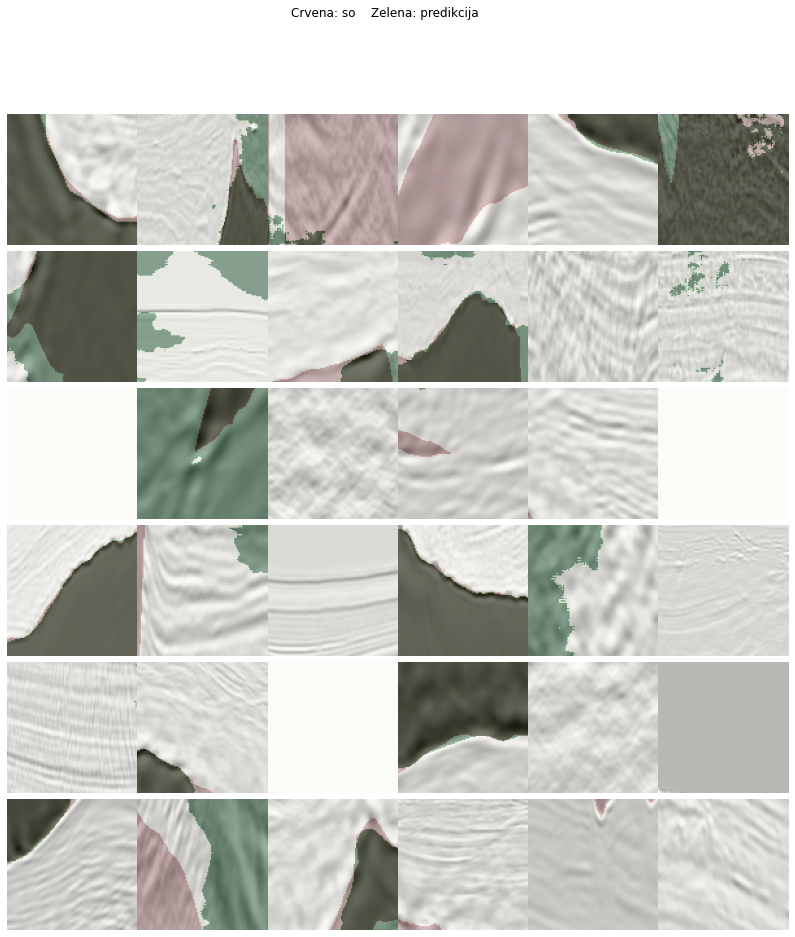

In [30]:
fig = plotValidationImages(x_validation, y_validation, np.round(pred_validation), k = 6, alpha1=0.4, alpha2=0.4)

IOU (Intersaction Over Union) metrika, potrebno je da bude što bliže 1.

In [31]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in

    true_objects = 2
    pred_objects = 2

    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))

    intersection = temp1[0]

    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Izračunava se unija
    union = area_true + area_pred - intersection
      
    # Isključuejmo pozadinu iz analize
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Izračunava se vrednost IOU metrike
    iou = intersection / union

    # Pomoćna funkcija preciznosti
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # tačno pogodjeni objekti
        false_positives = np.sum(matches, axis=0) == 0  # pogrešno klasifikovani objekti
        false_negatives = np.sum(matches, axis=1) == 0  # objekti koji su pogrešno prepoznati kao negativni
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Prolazak kroz threshold iou vrednosti
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    # np.arrange vraca ravnomerno raspoređene vrednosti unutar intervala 0.5 i 1.0 sa korakom od 0.05
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [32]:
thresholds = np.linspace(0.3, 0.7, 31)
ious = np.array([iou_metric_batch(y_validation, np.int8(pred_validation > threshold)) for threshold in thresholds])
print(ious)

[0.47825  0.48725  0.491625 0.494625 0.501875 0.505    0.509375 0.51625
 0.519    0.52575  0.527875 0.53025  0.533625 0.535625 0.538625 0.5395
 0.54125  0.54225  0.5425   0.54475  0.5445   0.54575  0.5505   0.554
 0.555625 0.558125 0.56025  0.560875 0.563    0.56425  0.5665  ]


In [33]:
threshold_best_index = np.argmax(ious) 
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]
print("threshold best",threshold_best)
print("iou best",iou_best)

threshold best 0.7
iou best 0.5665


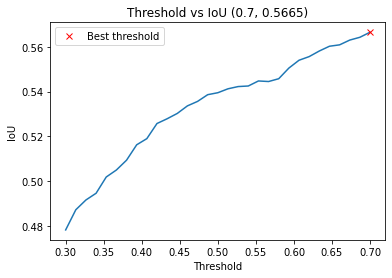

In [34]:
plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

Nasumičan prikaz nakon odrađene IOU metrike.

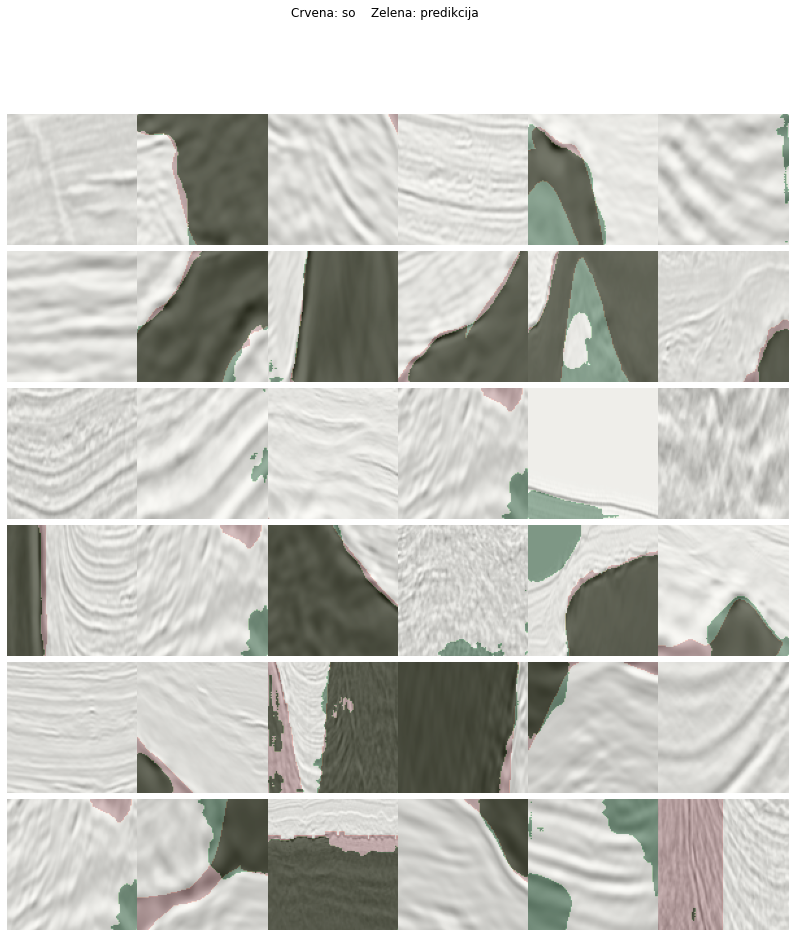

In [35]:
fig = plotValidationImages(x_validation, y_validation, np.int32(pred_validation > threshold_best), k = 6, alpha1=0.4, alpha2=0.4)